<a href="https://colab.research.google.com/github/Karansaini260/Unified-mentor/blob/main/Customer_support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'/content/customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.shape

(8469, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Observation:

There are no null values in a dataset.

Ticket discription is not that useful because their are two more columns ticket_type and ticket_Subject which define well the problem.

Resolution, Time to Resolution and Customer Satisfaction Rating are that columns which makes a truefull customer satisfaction rating and though the bases of this i see customer satisfaction index.

In [ ]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


Drop columns which are not useful

In [ ]:
df.drop(['Ticket Description','Customer Email','Time to Resolution'], axis=1, inplace=True)

In [ ]:
common_issues = df['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


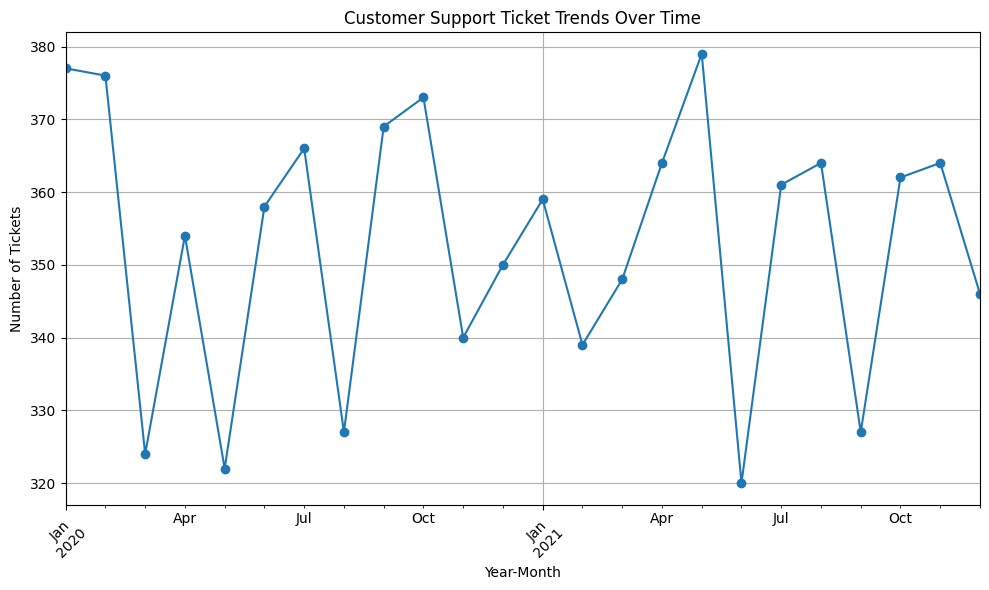

In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')
ticket_trends = df.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ticket_types = df['Ticket Type'].value_counts().head()
ticket_types

,count
Ticket Type,
Refund request,1752
Technical issue,1747
Cancellation request,1695
Product inquiry,1641
Billing inquiry,1634


In [ ]:
ticket_subject = df['Ticket Subject'].value_counts().head(10)
ticket_subject

,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547
Battery life,542
Network problem,539
Installation support,530
Product setup,529


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Refund request'),
  Text(1, 0, 'Software bug'),
  Text(2, 0, 'Product compatibility'),
  Text(3, 0, 'Delivery problem'),
  Text(4, 0, 'Hardware issue'),
  Text(5, 0, 'Battery life'),
  Text(6, 0, 'Network problem'),
  Text(7, 0, 'Installation support'),
  Text(8, 0, 'Product setup'),
  Text(9, 0, 'Payment issue')])

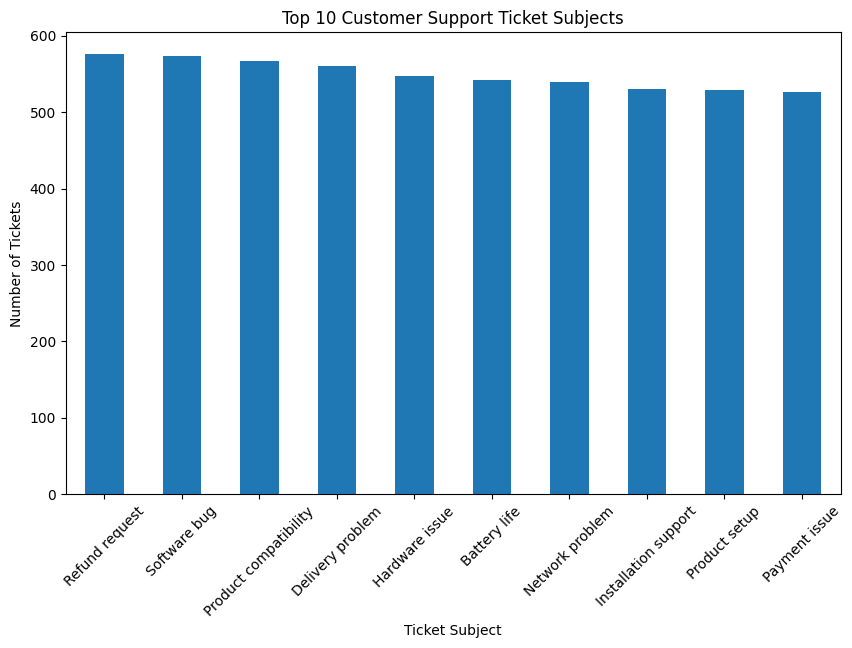

In [ ]:
ticket_subject.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customer Support Ticket Subjects')
plt.xlabel('Ticket Subject')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)

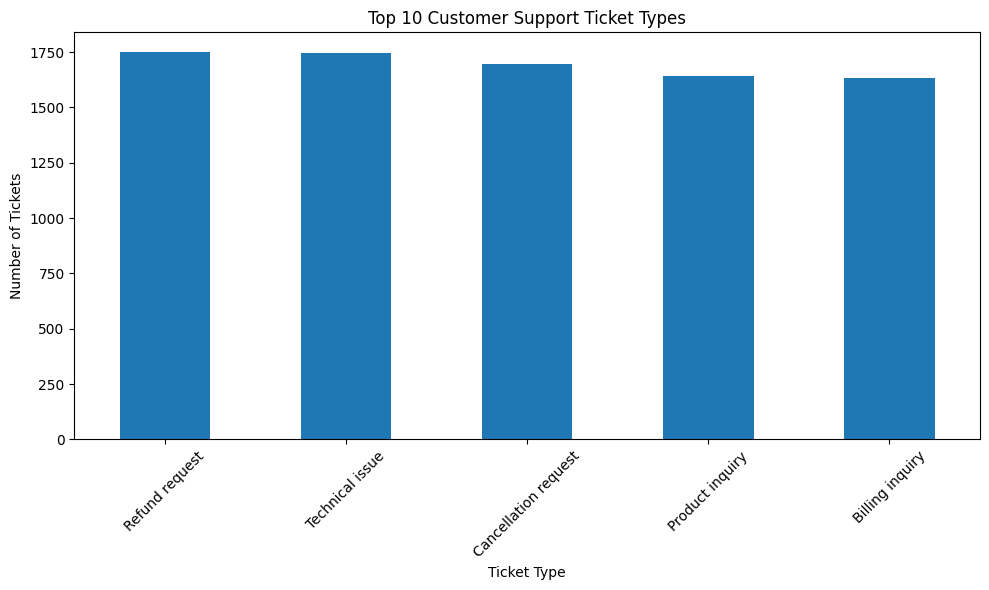

In [ ]:
ticket_types.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customer Support Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we see that Ticket Subject and Ticket Type are similar.
Ticket type contain overall issue but Ticket Subject tells exact reason about issue.

In [ ]:
# df.drop(['Ticket Type'], axis=1, inplace=True)

Product Information , It shows which Product have higher issue through this next relations could be build.

In [ ]:
Product_Information = df['Product Purchased'].value_counts().head(10)
Product_Information

,count
Product Purchased,
Canon EOS,240
GoPro Hero,228
Nest Thermostat,225
Amazon Echo,221
Philips Hue Lights,221
LG Smart TV,219
Sony Xperia,217
Roomba Robot Vacuum,216
Apple AirPods,213


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Canon EOS'),
  Text(1, 0, 'GoPro Hero'),
  Text(2, 0, 'Nest Thermostat'),
  Text(3, 0, 'Amazon Echo'),
  Text(4, 0, 'Philips Hue Lights'),
  Text(5, 0, 'LG Smart TV'),
  Text(6, 0, 'Sony Xperia'),
  Text(7, 0, 'Roomba Robot Vacuum'),
  Text(8, 0, 'Apple AirPods'),
  Text(9, 0, 'LG OLED')])

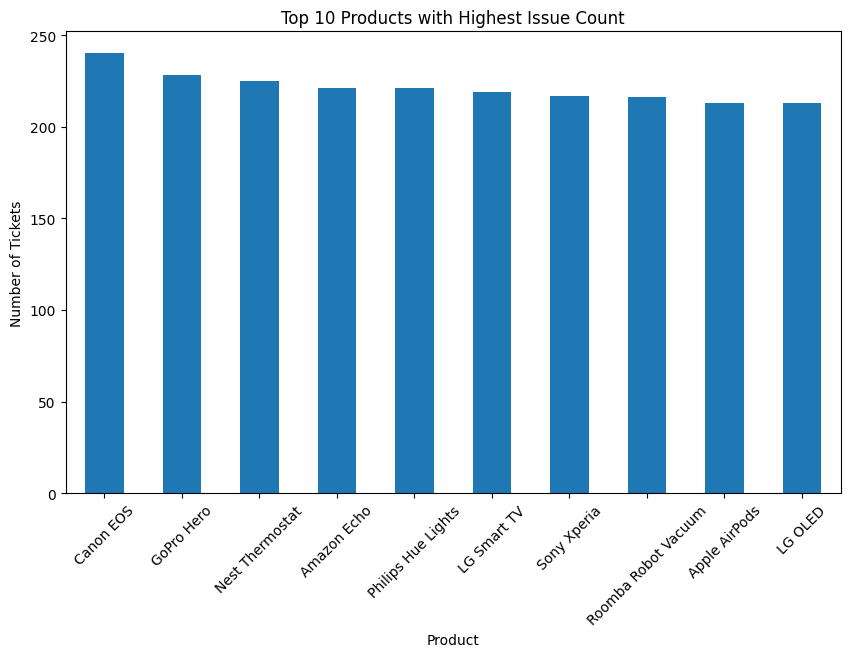

In [ ]:
plt.figure(figsize=(10, 6))
Product_Information.plot(kind='bar')
plt.title('Top 10 Products with Highest Issue Count')
plt.xlabel('Product')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)

In [ ]:
df.head()

,Ticket ID,Customer Name,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating,YearMonth
0,1,Marisa Obrien,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,2021-03
1,2,Jessica Rios,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,2021-05
2,3,Christopher Robbins,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,3.0,2020-07
3,4,Christina Dillon,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,3.0,2020-11
4,5,Alexander Carroll,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,1.0,2020-02


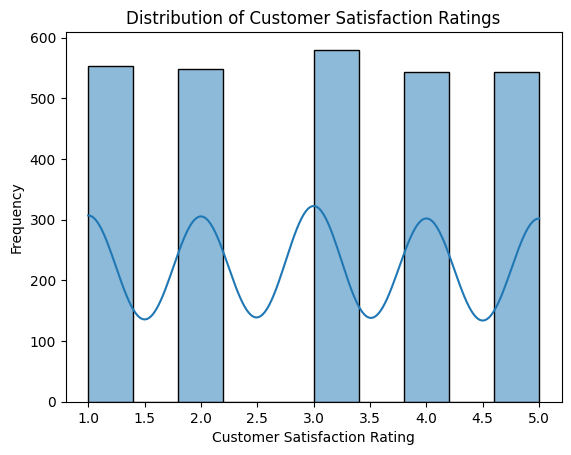

In [ ]:
sns.histplot(df['Customer Satisfaction Rating'], bins=10, kde=True)
plt.title('Distribution of Customer Satisfaction Ratings')
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

Coorelation Charts

In [ ]:
df['Customer Age'].value_counts().head(10)

,count
Customer Age,
52,186
56,182
24,180
27,180
34,177
59,177
44,173
20,173
48,172


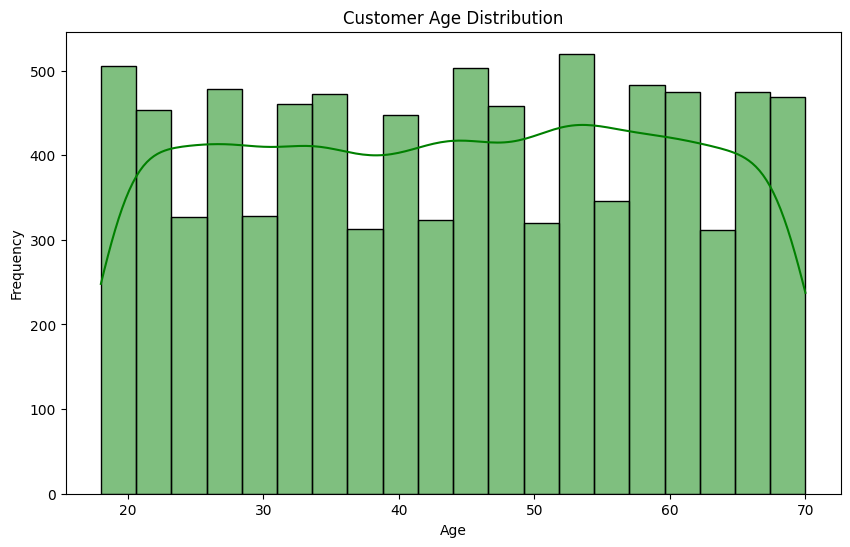

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True,
color='green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['CustomerSatisfactionRating'] = df['Customer Satisfaction Rating'].value_counts()
df['CustomerSatisfactionRating']

,CustomerSatisfactionRating
0,NaN
1,553.0
2,549.0
3,580.0
4,543.0
...,...
8464,NaN
8465,NaN
8466,NaN
8467,NaN


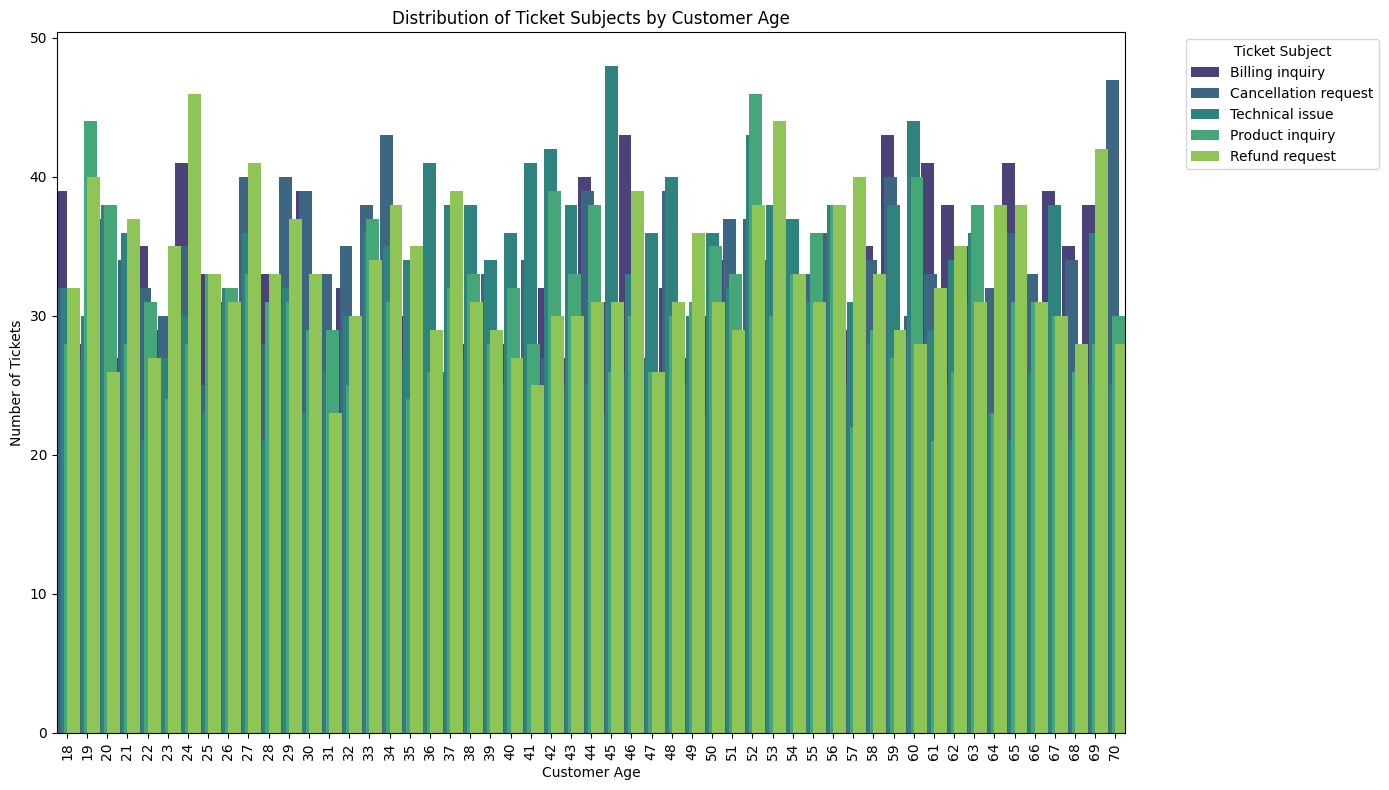

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Customer Age', hue='Ticket Type', palette='viridis',gap=5)
plt.title('Distribution of Ticket Subjects by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.legend(title='Ticket Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

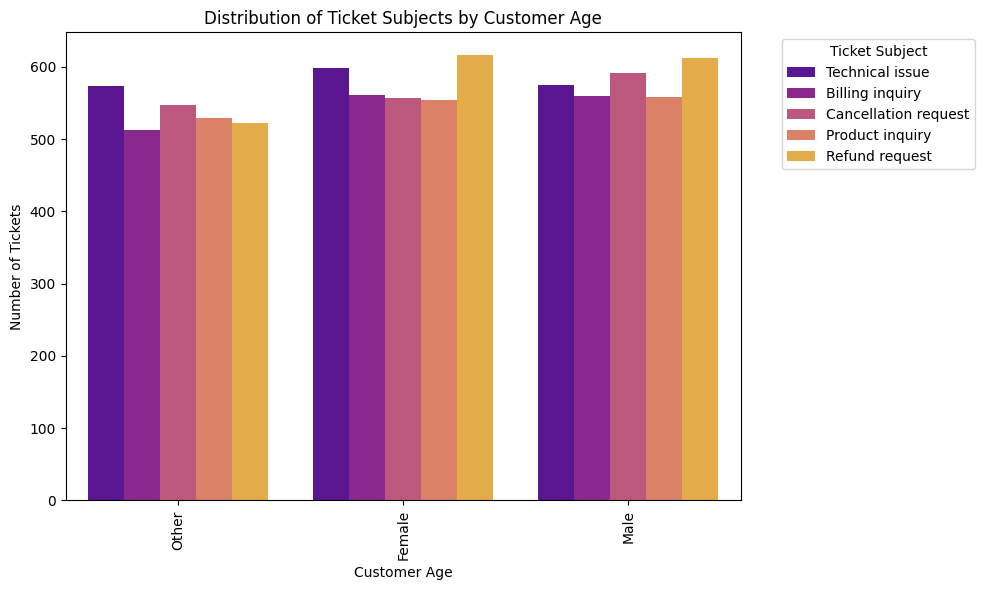

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer Gender', hue='Ticket Type', palette='plasma')
plt.title('Distribution of Ticket Subjects by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.legend(title='Ticket Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Top Product purchased
top_products = df['Product Purchased'].value_counts().head(10)
top_products

,count
Product Purchased,
Canon EOS,240
GoPro Hero,228
Nest Thermostat,225
Amazon Echo,221
Philips Hue Lights,221
LG Smart TV,219
Sony Xperia,217
Roomba Robot Vacuum,216
Apple AirPods,213


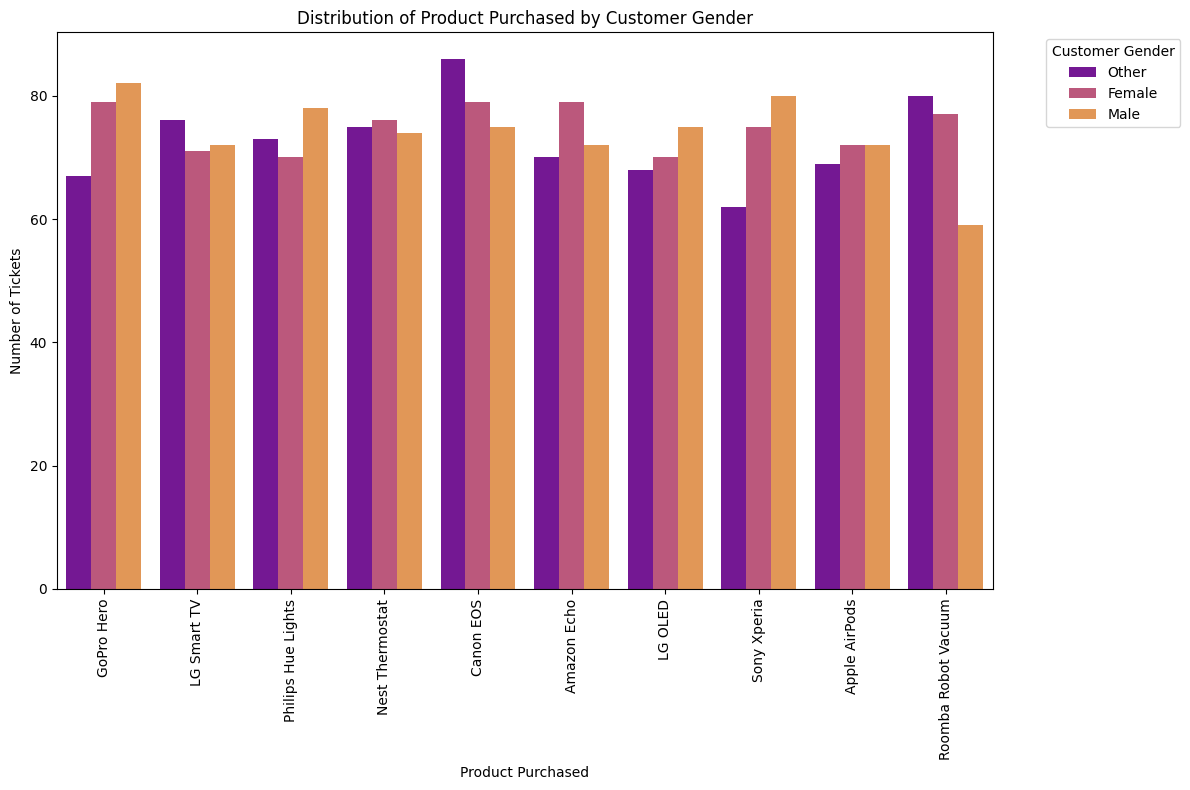

In [ ]:
df_top_products = df[df['Product Purchased'].isin(top_products.index)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_products, x='Product Purchased', hue='Customer Gender', palette='plasma')
plt.title('Distribution of Product Purchased by Customer Gender')
plt.xlabel('Product Purchased')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.legend(title='Customer Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

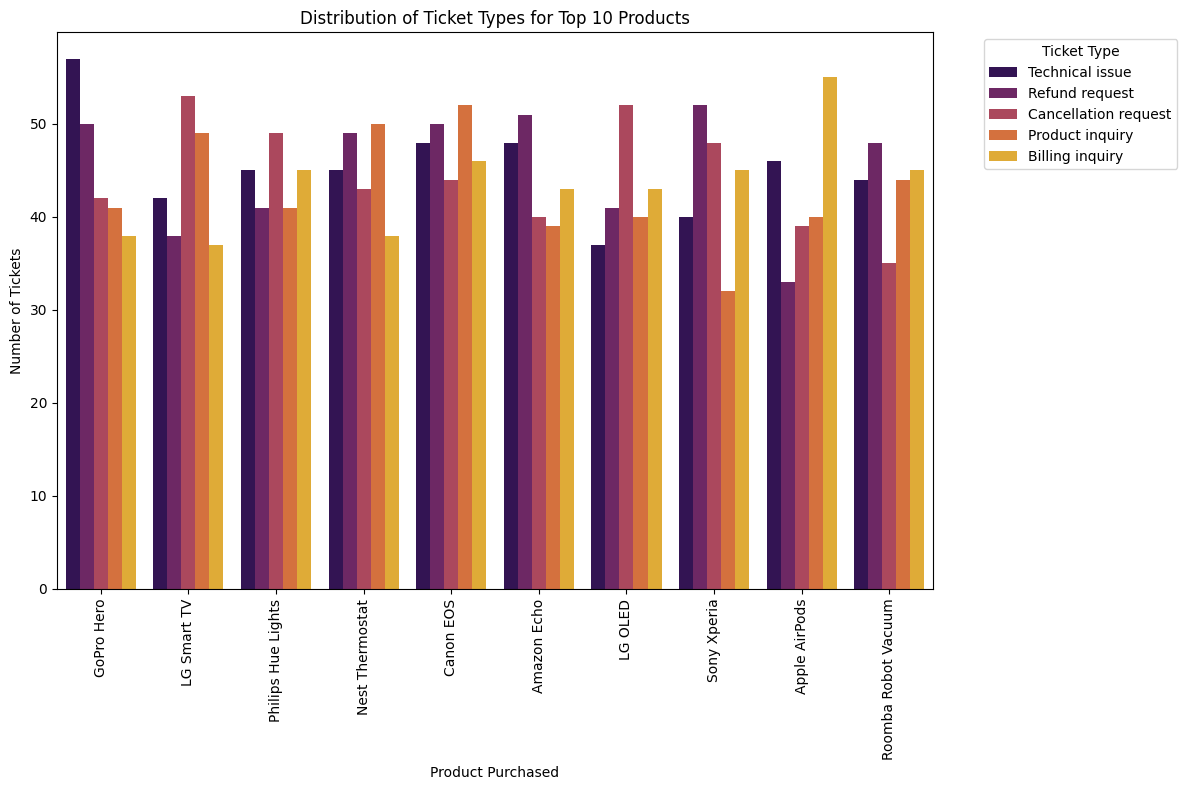

In [ ]:
# Filter the DataFrame to include only the top 10 products
df_top_products = df[df['Product Purchased'].isin(top_products.index)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_products, x='Product Purchased', hue='Ticket Type', palette='inferno')
plt.title('Distribution of Ticket Types for Top 10 Products')
plt.xlabel('Product Purchased')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Handle missing values

### Subtask:
Address missing values in relevant columns, especially 'Resolution', 'First Response Time', 'Time to Resolution', and 'Customer Satisfaction Rating'.


**Reasoning**:
Identify columns with missing values and their counts.



In [ ]:
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Customer Satisfaction Rating    5700
YearMonth                          0
CustomerSatisfactionRating      8464
dtype: int64


**Reasoning**:
Fill missing values in 'Resolution' and 'Customer Satisfaction Rating' columns as instructed.



In [ ]:
df['Resolution'].fillna('No resolution provided', inplace=True)
median_rating = df['Customer Satisfaction Rating'].median()
df['Customer Satisfaction Rating'].fillna(median_rating, inplace=True)
print(df.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Status                      0
Resolution                         0
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Customer Satisfaction Rating       0
YearMonth                          0
CustomerSatisfactionRating      8464
dtype: int64


/tmp/ipython-input-1558651242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resolution'].fillna('No resolution provided', inplace=True)
/tmp/ipython-input-1558651242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

## Convert data types

### Subtask:
Convert 'First Response Time' to datetime objects for time-based feature extraction.


**Reasoning**:
Convert 'First Response Time' to datetime objects and display the data types to confirm the conversion.



In [ ]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Age                  8469 non-null   int64         
 3   Customer Gender               8469 non-null   object        
 4   Product Purchased             8469 non-null   object        
 5   Date of Purchase              8469 non-null   datetime64[ns]
 6   Ticket Type                   8469 non-null   object        
 7   Ticket Subject                8469 non-null   object        
 8   Ticket Status                 8469 non-null   object        
 9   Resolution                    8469 non-null   object        
 10  Ticket Priority               8469 non-null   object        
 11  Ticket Channel                

None

## Extract time-based features

### Subtask:
Create new features from the datetime columns, such as response time.


**Reasoning**:
Calculate the time difference between 'First Response Time' and 'Date of Purchase' and extract the number of days.



In [ ]:
df['Response_Time_Delta'] = df['First Response Time'] - df['Date of Purchase']
df['Response_Time_Days'] = df['Response_Time_Delta'].dt.days
df.head()

,Ticket ID,Customer Name,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Customer Satisfaction Rating,YearMonth,CustomerSatisfactionRating,Response_Time_Delta,Response_Time_Days
0,1,Marisa Obrien,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,Pending Customer Response,No resolution provided,Critical,Social media,2023-06-01 12:15:36,3.0,2021-03,NaN,801 days 12:15:36,801.0
1,2,Jessica Rios,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,Pending Customer Response,No resolution provided,Critical,Chat,2023-06-01 16:45:38,3.0,2021-05,553.0,740 days 16:45:38,740.0
2,3,Christopher Robbins,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,3.0,2020-07,549.0,1052 days 11:14:38,1052.0
3,4,Christina Dillon,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,3.0,2020-11,580.0,930 days 07:29:40,930.0
4,5,Alexander Carroll,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,1.0,2020-02,543.0,1213 days 00:12:42,1213.0


## Encode categorical variables

### Subtask:
Convert categorical columns like 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', and 'Ticket Channel' into numerical representations using techniques like one-hot encoding.


**Reasoning**:
Apply one-hot encoding to the specified categorical columns and concatenate with the original DataFrame, dropping the original columns.



In [ ]:
categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Ticket Channel']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())
display(df_encoded.info())

,Ticket ID,Customer Name,Customer Age,Date of Purchase,Resolution,Ticket Priority,First Response Time,Customer Satisfaction Rating,YearMonth,CustomerSatisfactionRating,...,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Status_Open,Ticket Status_Pending Customer Response,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,1,Marisa Obrien,32,2021-03-22,No resolution provided,Critical,2023-06-01 12:15:36,3.0,2021-03,NaN,...,False,False,True,False,False,False,True,False,False,True
1,2,Jessica Rios,42,2021-05-22,No resolution provided,Critical,2023-06-01 16:45:38,3.0,2021-05,553.0,...,False,False,False,False,False,False,True,False,False,False
2,3,Christopher Robbins,48,2020-07-14,Case maybe show recently my computer follow.,Low,2023-06-01 11:14:38,3.0,2020-07,549.0,...,False,False,False,False,False,False,False,False,False,True
3,4,Christina Dillon,27,2020-11-13,Try capital clearly never color toward story.,Low,2023-06-01 07:29:40,3.0,2020-11,580.0,...,False,False,False,False,False,False,False,False,False,True
4,5,Alexander Carroll,67,2020-02-04,West decision evidence bit.,Low,2023-06-01 00:12:42,1.0,2020-02,543.0,...,False,False,False,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 79 columns):
 #   Column                                            Non-Null Count  Dtype          
---  ------                                            --------------  -----          
 0   Ticket ID                                         8469 non-null   int64          
 1   Customer Name                                     8469 non-null   object         
 2   Customer Age                                      8469 non-null   int64          
 3   Date of Purchase                                  8469 non-null   datetime64[ns] 
 4   Resolution                                        8469 non-null   object         
 5   Ticket Priority                                   8469 non-null   object         
 6   First Response Time                               5650 non-null   datetime64[ns] 
 7   Customer Satisfaction Rating                      8469 non-null   float64        
 8   YearMonth         

None

## Feature scaling

### Subtask:
Scale numerical features if necessary for certain models.


**Reasoning**:
Identify numerical columns for scaling, handle missing values in 'Response_Time_Days', and then scale these columns using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols_to_scale = ['Customer Age', 'Response_Time_Days']

# Handle missing values in 'Response_Time_Days' before scaling, using the median as an example
df_encoded['Response_Time_Days'].fillna(df_encoded['Response_Time_Days'].median(), inplace=True)

scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

display(df_encoded.head())
display(df_encoded.info())

/tmp/ipython-input-809851180.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Response_Time_Days'].fillna(df_encoded['Response_Time_Days'].median(), inplace=True)


,Ticket ID,Customer Name,Customer Age,Date of Purchase,Resolution,Ticket Priority,First Response Time,Customer Satisfaction Rating,YearMonth,CustomerSatisfactionRating,...,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Status_Open,Ticket Status_Pending Customer Response,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,1,Marisa Obrien,-0.786312,2021-03-22,No resolution provided,Critical,2023-06-01 12:15:36,3.0,2021-03,NaN,...,False,False,True,False,False,False,True,False,False,True
1,2,Jessica Rios,-0.132512,2021-05-22,No resolution provided,Critical,2023-06-01 16:45:38,3.0,2021-05,553.0,...,False,False,False,False,False,False,True,False,False,False
2,3,Christopher Robbins,0.259767,2020-07-14,Case maybe show recently my computer follow.,Low,2023-06-01 11:14:38,3.0,2020-07,549.0,...,False,False,False,False,False,False,False,False,False,True
3,4,Christina Dillon,-1.113212,2020-11-13,Try capital clearly never color toward story.,Low,2023-06-01 07:29:40,3.0,2020-11,580.0,...,False,False,False,False,False,False,False,False,False,True
4,5,Alexander Carroll,1.501986,2020-02-04,West decision evidence bit.,Low,2023-06-01 00:12:42,1.0,2020-02,543.0,...,False,False,False,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 79 columns):
 #   Column                                            Non-Null Count  Dtype          
---  ------                                            --------------  -----          
 0   Ticket ID                                         8469 non-null   int64          
 1   Customer Name                                     8469 non-null   object         
 2   Customer Age                                      8469 non-null   float64        
 3   Date of Purchase                                  8469 non-null   datetime64[ns] 
 4   Resolution                                        8469 non-null   object         
 5   Ticket Priority                                   8469 non-null   object         
 6   First Response Time                               5650 non-null   datetime64[ns] 
 7   Customer Satisfaction Rating                      8469 non-null   float64        
 8   YearMonth         

None

## Summary:

### Data Analysis Key Findings

*   Missing values were handled for the 'Resolution' and 'Customer Satisfaction Rating' columns. 'Resolution' missing values were filled with 'No resolution provided', and 'Customer Satisfaction Rating' missing values were filled with the median value.
*   The 'First Response Time' column was successfully converted to a datetime data type.
*   Two new time-based features, 'Response\_Time\_Delta' (timedelta) and 'Response\_Time\_Days' (integer), were created by calculating the difference between 'First Response Time' and 'Date of Purchase'.
*   Categorical variables including 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', and 'Ticket Channel' were successfully one-hot encoded, resulting in a significant increase in the number of columns.
*   Numerical features 'Customer Age' and 'Response\_Time\_Days' were successfully scaled using StandardScaler after imputing missing values in 'Response\_Time\_Days' with the median.

### Insights or Next Steps

*   Investigate the remaining missing values in 'First Response Time' and 'CustomerSatisfactionRating' to determine the best strategy for handling them.
*   Evaluate the impact of the high dimensionality introduced by one-hot encoding on model performance and consider dimensionality reduction techniques if necessary.


# Task
Build a model to predict customer satisfaction rating.

## Define the target variable

### Subtask:
Identify the target variable for prediction, which is 'Customer Satisfaction Rating'.


**Reasoning**:
Select the target variable 'Customer Satisfaction Rating' and display its head.



In [ ]:
y = df_encoded['Customer Satisfaction Rating']
display(y.head())

,Customer Satisfaction Rating
0,3.0
1,3.0
2,3.0
3,3.0
4,1.0


## Prepare data for modeling

### Subtask:
Separate the features (X) and the target variable (y) from the dataframe. Handle any remaining missing values or inconsistencies in the data.


**Reasoning**:
Create the features DataFrame X by dropping the specified columns and display the head and info of X.



In [ ]:
X = df_encoded.drop(['Customer Satisfaction Rating', 'Ticket ID', 'Customer Name', 'Date of Purchase', 'Resolution', 'Ticket Priority', 'First Response Time', 'YearMonth', 'CustomerSatisfactionRating', 'Response_Time_Delta'], axis=1)
display(X.head())
display(X.info())

,Customer Age,Response_Time_Days,Customer Gender_Male,Customer Gender_Other,Product Purchased_Amazon Echo,Product Purchased_Amazon Kindle,Product Purchased_Apple AirPods,Product Purchased_Asus ROG,Product Purchased_Autodesk AutoCAD,Product Purchased_Bose QuietComfort,...,Ticket Subject_Product compatibility,Ticket Subject_Product recommendation,Ticket Subject_Product setup,Ticket Subject_Refund request,Ticket Subject_Software bug,Ticket Status_Open,Ticket Status_Pending Customer Response,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media
0,-0.786312,-0.484264,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,-0.132512,-0.836760,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.259767,0.966172,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.113212,0.261179,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1.501986,1.896531,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 69 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer Age                                      8469 non-null   float64
 1   Response_Time_Days                                8469 non-null   float64
 2   Customer Gender_Male                              8469 non-null   bool   
 3   Customer Gender_Other                             8469 non-null   bool   
 4   Product Purchased_Amazon Echo                     8469 non-null   bool   
 5   Product Purchased_Amazon Kindle                   8469 non-null   bool   
 6   Product Purchased_Apple AirPods                   8469 non-null   bool   
 7   Product Purchased_Asus ROG                        8469 non-null   bool   
 8   Product Purchased_Autodesk AutoCAD                8469 non-null   bool   
 9   Product Purchased_B

None

## Split the data

### Subtask:
Split the dataset into training and testing sets to evaluate the model's performance.


**Reasoning**:
Split the features and target variable into training and testing sets and print their shapes to verify the split.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6775, 69)
Shape of X_test: (1694, 69)
Shape of y_train: (6775,)
Shape of y_test: (1694,)


## Choose a model

### Subtask:
Select an appropriate model for predicting customer satisfaction. Given the nature of the target variable, a classification or regression model could be suitable.


**Reasoning**:
The target variable 'Customer Satisfaction Rating' is a discrete numerical value ranging from 1 to 5. This can be treated as a classification problem where the goal is to predict the rating category. Given the dataset characteristics and the nature of the problem, a Logistic Regression model is a suitable choice for multi-class classification.



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
print("Selected model: Logistic Regression")

Selected model: Logistic Regression


## Train the model

### Subtask:
Train the chosen model using the training data.


**Reasoning**:
Fit the Logistic Regression model to the training data.



In [ ]:
model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


## Evaluate the model

### Subtask:
Evaluate the trained model using the testing data and appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE, R-squared for regression).


**Reasoning**:
Make predictions on the test set and evaluate the model using appropriate classification metrics.



In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7344
Precision: 0.7174
Recall: 0.7344
F1-score: 0.7251


## Tune hyperparameters

### Subtask:
Optimize the model's performance by tuning its hyperparameters (optional but recommended).


**Reasoning**:
Import GridSearchCV, define parameter grid, instantiate and fit GridSearchCV, and print the best parameters and score.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'] # LogisticRegression with default solver 'lbfgs' only supports 'l2' penalty
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1-score: {:.4f}".format(grid_search.best_score_))

Best parameters found:  {'C': 100, 'penalty': 'l2'}
Best cross-validation F1-score: 0.7353


**Reasoning**:
Retrain the model with the best hyperparameters found by GridSearchCV and evaluate its performance on the test set.



In [ ]:
# Retrain the model with the best parameters
best_model = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], max_iter=1000)
best_model.fit(X_train, y_train)

# Evaluate the retrained model on the test set
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy with best parameters: {accuracy_best:.4f}")
print(f"Precision with best parameters: {precision_best:.4f}")
print(f"Recall with best parameters: {recall_best:.4f}")
print(f"F1-score with best parameters: {f1_best:.4f}")

Accuracy with best parameters: 0.7361
Precision with best parameters: 0.7247
Recall with best parameters: 0.7361
F1-score with best parameters: 0.7296


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the best_model object to make predictions on the test features X_test and display the first few predictions.



In [ ]:
y_pred_new = best_model.predict(X_test)
print("First few predictions:")
print(y_pred_new[:5])

First few predictions:
[3. 2. 3. 2. 3.]


## Summary:

### Data Analysis Key Findings

*   The target variable, 'Customer Satisfaction Rating', is a discrete numerical variable ranging from 1 to 5.
*   The features DataFrame `X` contains 69 columns and 8469 rows with no missing values.
*   The dataset was split into training (80\%) and testing (20\%) sets.
*   A Logistic Regression model was chosen and trained for the multi-class classification task.
*   Initial evaluation on the test set yielded an Accuracy of 0.7344, Precision of 0.7174, Recall of 0.7344, and F1-score of 0.7251.
*   Hyperparameter tuning using GridSearchCV found the best parameters for Logistic Regression to be `{'C': 100, 'penalty': 'l2'}`.
*   Retraining the model with the best parameters resulted in slightly improved performance on the test set: Accuracy of 0.7361, Precision of 0.7247, Recall of 0.7361, and F1-score of 0.7296.

### Insights or Next Steps

*   The tuned Logistic Regression model provides a reasonable baseline for predicting customer satisfaction ratings with an F1-score of approximately 0.73.
*   Explore more advanced classification models such as Random Forest or Gradient Boosting to potentially improve prediction performance.
